# Predicting Car Price

The [dataset](https://archive.ics.uci.edu/ml/datasets/automobile) for prediction of car price contains information on various cars. For each car there is information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

  The machine learning model we are going to use is k nearest neighborhood. But before that we are going to import some libraries and clean the data.

In [84]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
#Reading Data
cars = pd.read_csv('imports-85.data')

In [86]:
#Printing first five rows
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Data Cleaning

You can see that columns of dataframe a not in clear format. So, we are going to replace them with new columns.

In [87]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [88]:
#Replacing the columns with new columns
cars.columns = cols

In [89]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [90]:
#Replacing '?' with NAN value
cars.replace('?',np.nan)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,NaN
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


As it can be seen the dataset contains string type categorical and discontinous values. So, we are going to remove all the values that won't helps us to predict the data.

In [91]:
#Removing columns that are not continous 
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [96]:
numeric_cars.replace('?',np.nan, inplace = True)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
5,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
6,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
7,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
8,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN
9,192,101.2,176.8,64.8,54.3,2395,3.50,2.80,8.80,101,5800,23,29,16430


In [97]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [95]:
#Converting all the values to float type
numeric_cars = numeric_cars.astype('float')

ValueError: could not convert string to float: '?'

In [69]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized-losses    204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
bore                 204 non-null object
stroke               204 non-null object
compression-rate     204 non-null float64
horsepower           204 non-null object
peak-rpm             204 non-null object
city-mpg             204 non-null int64
highway-mpg          204 non-null int64
price                204 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.4+ KB


In [70]:
# As `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [71]:
numeric_cars = numeric_cars.dropna(subset = ['price'])

In [72]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [73]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [74]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [75]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [76]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [79]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars =  (numeric_cars - numeric_cars.min())/ (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

ValueError: operands could not be broadcast together with shapes (1224,) (6,) 

In [78]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Univariate Model

In [24]:

def knn_train_test(feature_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed()
    
    # Randomize order of rows in data frame.
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
     # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = df[0:last_train_row]
    test_df = df[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[feature_col]],train_df[target_col])
    
    # Make predictions using model.
    predict = knn.predict(test_df[[feature_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predict)
    rmse = np.sqrt(mse)
    return rmse

rmse_result = {}
features_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in features_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_result[col] = rmse_val
    

In [25]:
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_result_series = pd.Series(rmse_result)
rmse_result_series.sort_values()

highway-mpg           3970.922933
horsepower            4178.606478
city-mpg              5092.868063
curb-weight           5102.952989
width                 7122.130847
compression-rate      7760.437327
length                7953.614345
normalized-losses     8152.626555
stroke                9066.559377
peak-rpm              9738.153272
wheel-base           10048.153976
height               10705.689088
bore                 13490.742630
dtype: float64

In [26]:
def knn_train_test(feature_col, target_col, df):
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
     # Divide number of rows in half and round.
    last_train_col = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df[0:last_train_col] 
    test_df = rand_df[last_train_col:]
    
    k_values = [1,2,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit a KNN model using k value.
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[feature_col]], train_df[target_col])
        
        # Make predictions using model.
        predict = knn.predict(test_df[[feature_col]])
        
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col],predict)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses
    
k_rmse_results = {}
feature_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in features_cols:
    rmse_val = knn_train_test(col,'price',numeric_cars)
    k_rmse_results[col] = rmse_val

In [27]:
k_rmse_results

{'bore': {1: 9352.492626032912,
  2: 9307.043469061484,
  5: 8290.600835741641,
  7: 7859.713081575807,
  9: 7783.164147903465},
 'city-mpg': {1: 5818.4533958776365,
  2: 5073.165431710265,
  5: 4845.839537500185,
  7: 5161.409761699149,
  9: 5361.131021148982},
 'compression-rate': {1: 7634.525861505743,
  2: 7073.88553748928,
  5: 7105.992380941595,
  7: 7370.613020070492,
  9: 7740.3395156578445},
 'curb-weight': {1: 6410.167348049503,
  2: 5186.463075883217,
  5: 4535.348932022761,
  7: 4718.019656160661,
  9: 4341.729798133459},
 'height': {1: 9553.790944436663,
  2: 8651.847662349355,
  5: 8229.562408074928,
  7: 7772.41591356699,
  9: 7785.187603613466},
 'highway-mpg': {1: 5786.330712982105,
  2: 5129.186668712692,
  5: 4967.247820191781,
  7: 4905.776699307601,
  9: 4879.399527251607},
 'horsepower': {1: 3670.312061664512,
  2: 3959.077746142402,
  5: 3953.890476429513,
  7: 4394.3616198859345,
  9: 4430.083461884128},
 'length': {1: 5860.960629453161,
  2: 6167.838972444077,


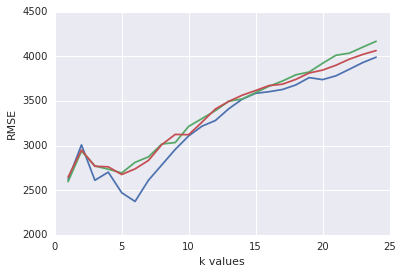

In [57]:
#plotting line plot
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k values')
    plt.ylabel('RMSE')

## Multivariate Model

Now we are going to predict the car price using multiple features.

In [36]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4081.545073
width                4515.304623
curb-weight          5038.345762
highway-mpg          5133.588286
city-mpg             5251.999830
wheel-base           5750.177079
length               6295.520616
compression-rate     7385.071263
normalized-losses    7733.359113
peak-rpm             7793.181976
stroke               7888.451165
height               8398.560906
bore                 8518.602832
dtype: float64

In [52]:
def knn_train_test(feature_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
     # Divide number of rows in half and round.
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    knn = KNeighborsRegressor()
    # Fit a KNN model using k value.
    knn.fit(train_df[feature_col], train_df[target_col])
    
    # Make predictions using model.
    predict = knn.predict(test_df[feature_col])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predict)
    rmse = np.sqrt(mse)
    return rmse

rmse_results ={}

two_best_feature = ['horsepower','width']
rmse_val = knn_train_test(two_best_feature, 'price', numeric_cars)    
rmse_results['two_best_feature'] = rmse_val

three_best_feature = ['horsepower','width','curb-weight']
rmse_val = knn_train_test(three_best_feature,'price', numeric_cars)
rmse_results['three_best_feature'] = rmse_val

four_best_feature = ['horsepower','width','curb-weight','highway-mpg']
rmse = knn_train_test(four_best_feature, 'price',numeric_cars)
rmse_results['four_best_feature'] = rmse

five_best_feature = ['horsepower','width','curb-weight','highway-mpg','city-mpg']
rmse = knn_train_test(five_best_feature, 'price',numeric_cars)
rmse_results['five_best_feature'] = rmse

rmse_results

{'five_best_feature': 2692.4443467600217,
 'four_best_feature': 2675.245416405755,
 'three_best_feature': 2472.0695292001806,
 'two_best_feature': 3181.0868240272853}

In [54]:
def knn_train_test(feature_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
     # Divide number of rows in half and round.
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmse = {}
    
    for k in k_values:
        # Fit a KNN model using k value.
        knn = KNeighborsRegressor(n_neighbors= k)
        knn.fit(train_df[feature_col], train_df[target_col])
        
        # Make predictions using model.
        predict = knn.predict(test_df[feature_col])
        
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predict)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results ={}

three_best_feature = ['horsepower','width','curb-weight']
rmse_val = knn_train_test(three_best_feature,'price', numeric_cars)
k_rmse_results['three_best_feature'] = rmse_val

four_best_feature = ['horsepower','width','curb-weight','highway-mpg']
rmse = knn_train_test(four_best_feature, 'price',numeric_cars)
k_rmse_results['four_best_feature'] = rmse

five_best_feature = ['horsepower','width','curb-weight','highway-mpg','city-mpg']
rmse = knn_train_test(five_best_feature, 'price',numeric_cars)
k_rmse_results['five_best_feature'] = rmse

k_rmse_results

{'five_best_feature': {1: 2595.535420679132,
  2: 2938.154762772036,
  3: 2771.1908254595373,
  4: 2734.743670803536,
  5: 2692.4443467600217,
  6: 2811.3925447286006,
  7: 2872.838008283226,
  8: 3016.9241759768756,
  9: 3033.3166053262803,
  10: 3213.757473472446,
  11: 3301.8312665314425,
  12: 3391.0228749146536,
  13: 3496.138901000467,
  14: 3521.376651153028,
  15: 3592.123430284656,
  16: 3663.6348309954165,
  17: 3721.8540942277314,
  18: 3791.542670451152,
  19: 3823.6277931289037,
  20: 3920.3877149046116,
  21: 4011.098762620046,
  22: 4034.276181676376,
  23: 4101.966386008919,
  24: 4167.5305491031895},
 'four_best_feature': {1: 2645.8112952363026,
  2: 2949.2589077597104,
  3: 2767.870154910531,
  4: 2761.2335281310416,
  5: 2675.245416405755,
  6: 2738.1523661038295,
  7: 2832.8203281232945,
  8: 3010.373507167549,
  9: 3124.3271860603136,
  10: 3121.1565177831117,
  11: 3261.742744909068,
  12: 3409.056363376903,
  13: 3494.4260497398695,
  14: 3563.3961568442323,
  15

As we can see using k value between 5 to 7, usually gives us min root mean square error hence better the chance of predicting the car price.